In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

load the data in the file data/gapminder_lifeexpectancy.xlsx

In [27]:
df_life_expectancy=pd.read_excel('gapminder_lifeexpectancy.xlsx')
df_life_expectancy.head()


,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,28.11,28.10,28.09,28.08,28.07,28.06,28.05,28.04,28.03,28.02,28.01,28.00,27.99,27.98,27.97,27.95,27.94,27.93,27.92,27.91,27.90,27.89,27.88,27.87,27.86,27.85,27.84,27.83,27.82,...,40.53,40.98,41.46,41.96,42.51,43.11,43.75,44.45,45.21,46.02,46.87,47.74,48.62,49.5,49.3,49.4,49.5,48.9,49.4,49.7,49.5,48.6,50.0,50.1,50.4,51.0,51.4,51.8,52.0,52.1,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,70.54,70.86,71.14,71.39,71.63,71.88,72.15,72.42,72.71,72.96,73.14,73.25,73.30,73.3,73.4,73.6,73.6,73.6,73.7,73.8,74.1,74.2,74.2,74.7,75.1,75.5,75.7,75.9,76.2,76.4,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,57.13,58.28,59.56,60.92,62.31,63.69,64.97,66.15,67.18,68.04,68.75,69.33,69.81,70.2,70.5,70.9,71.2,71.4,71.6,72.1,72.4,72.6,73.0,73.3,73.5,73.8,73.9,74.4,74.8,75.0,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [28]:
df_continents=pd.read_csv('continents.csv', sep=';')
df_continents.head()

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [29]:
df_continents.rename(columns={'country':'Life expectancy'}, inplace=True)
df_continents.shape
df_continents.head()


,continent,Life expectancy
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


select a year from the DataFrame

In [30]:
life_expectancy_2015=df_life_expectancy[['Life expectancy', 2015]]
life_expectancy_2015.shape
life_expectancy_2015.head()



,Life expectancy,2015
0,Abkhazia,NaN
1,Afghanistan,53.8
2,Akrotiri and Dhekelia,NaN
3,Albania,78.0
4,Algeria,76.4


merge both DataFrames

In [31]:
df_completed=pd.merge(life_expectancy_2015,df_continents,how='inner',on='Life expectancy')

In [32]:
df_completed.shape

(176, 3)

In [33]:
df_completed.head()

,Life expectancy,2015,continent
0,Afghanistan,53.8,Asia
1,Albania,78.0,Europe
2,Algeria,76.4,Africa
3,Andorra,84.8,Europe
4,Angola,59.6,Africa


In [34]:
df_completed.head()

,Life expectancy,2015,continent
0,Afghanistan,53.8,Asia
1,Albania,78.0,Europe
2,Algeria,76.4,Africa
3,Andorra,84.8,Europe
4,Angola,59.6,Africa


In [35]:
df_completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Life expectancy  176 non-null    object 
 1   2015             170 non-null    float64
 2   continent        176 non-null    object 
dtypes: float64(1), object(2)
memory usage: 5.5+ KB


remove all rows with empty values

In [37]:
df_completed.dropna(inplace=True)
df_completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 175
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Life expectancy  170 non-null    object 
 1   2015             170 non-null    float64
 2   continent        170 non-null    object 
dtypes: float64(1), object(2)
memory usage: 5.3+ KB


print the highest and lowest life expectancy for each continent


In [38]:
df_life_expectancy_continent_max=df_completed.groupby(df_completed['continent']).max().sort_values(by=2015, ascending=False)
df_life_expectancy_continent_max

,Life expectancy,2015
continent,,
Europe,United Kingdom,84.8
Asia,Yemen,83.2
Australia and Oceania,Vanuatu,82.3
North America,United States,81.7
South America,Venezuela,79.5
Africa,Zimbabwe,77.6


In [39]:
df_life_expectancy_continent_min=df_completed.groupby(df_completed['continent']).min().sort_values(by=2015, ascending=False)
df_life_expectancy_continent_min

,Life expectancy,2015
continent,,
Europe,Albania,71.0
South America,Argentina,66.8
North America,Antigua and Barbuda,64.3
Australia and Oceania,Australia,60.9
Asia,Afghanistan,53.8
Africa,Algeria,47.1


plot the numbers

In [40]:
df_completed_ascending=df_completed.sort_values(by=2015, ascending=False)

In [41]:
df_completed_ascending

,Life expectancy,2015,continent
3,Andorra,84.8,Europe
70,Iceland,83.3,Europe
79,Japan,83.2,Asia
150,Switzerland,83.0,Europe
144,Spain,82.6,Europe
...,...,...,...
142,Somalia,54.2,Africa
0,Afghanistan,53.8,Asia
148,Swaziland,51.8,Africa
31,Central African Republic,49.6,Africa


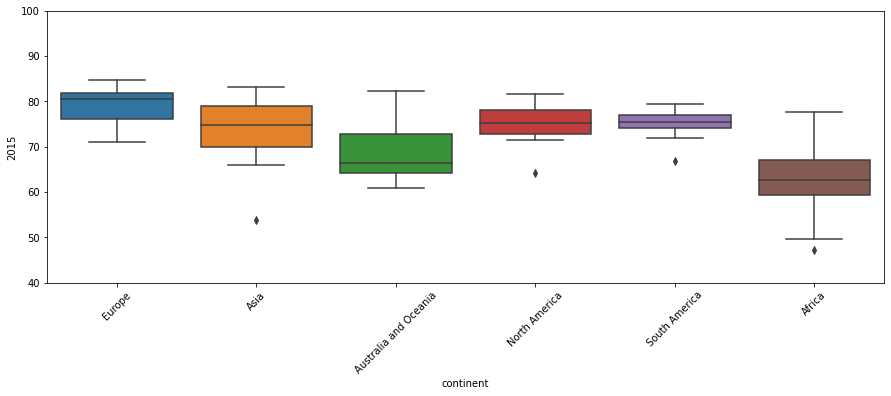

In [42]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.boxplot(x=df_completed_ascending['continent'], y=df_completed_ascending[2015])
plt.ylim(40, 100)
plt.show()